In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def SIR_changing_total_population(S0,I0,R0, beta, gamma, t_max, stepsize, birth_rate, death_rate):
    T = np.arange(0,t_max+stepsize,stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N = S0+I0+R0
    not_printed_time_yet = True
    
    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
        else:
            N = S[idx - 1] + I[idx-1] + R[idx-1]
            
            if(N >= 1500 and not_printed_time_yet == True):
                not_printed_time_yet = False
                print("Population reached 1500 at year", t)

            total_birth = N * birth_rate
            total_s_death = S[idx-1] * death_rate
            total_i_death = I[idx-1] * death_rate
            total_r_death = R[idx-1] * death_rate

            dS_dt = (-beta * S[idx-1] * I[idx-1] / N) + total_birth - total_s_death
            dI_dt = (beta * S[idx-1] * I[idx-1] / N - gamma * I[idx-1]) - total_i_death
            dR_dt = (gamma * I[idx-1]) - total_r_death
            
            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize
    
    return S, I, R, T

Population reached 1500 at year 81.2


Text(0.5, 1.0, 'SIR(Zach made this graph)')

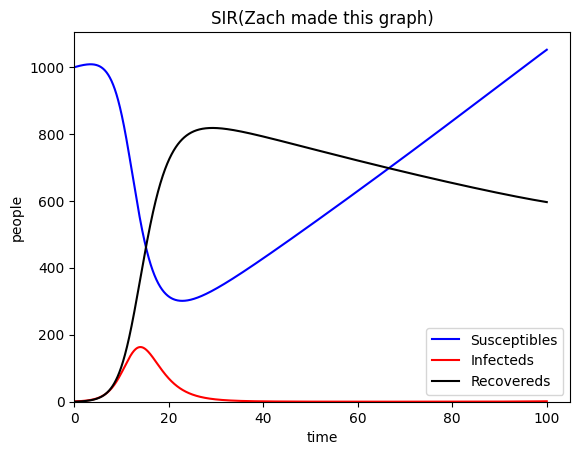

In [3]:
S_init = 999
I_init = 1
R_init = 0
beta = 1
gamma = .5
t_max = 100
stepsize = 0.05
birth_rate = .01
death_rate = birth_rate * .5

# SIR(S0,I0,R0, beta, gamma, t_max, stepsize):
S,I,R,T = SIR_changing_total_population(S_init, I_init, R_init, beta, gamma, t_max, stepsize, birth_rate, death_rate)
N = S[t_max]+I[t_max]+R[t_max]
fig, ax = plt.subplots()
ax.plot(T,S, color='b', label='Susceptibles')
ax.plot(T,I, color='r', label='Infecteds')
ax.plot(T,R, color='k', label='Recovereds')
ax.set_xlabel('time')
ax.set_ylabel('people')
ax.legend()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.set_title("SIR(Zach made this graph)")

In [4]:
import scipy.optimize as sp
import numpy as np

[-4.4408921e-16]


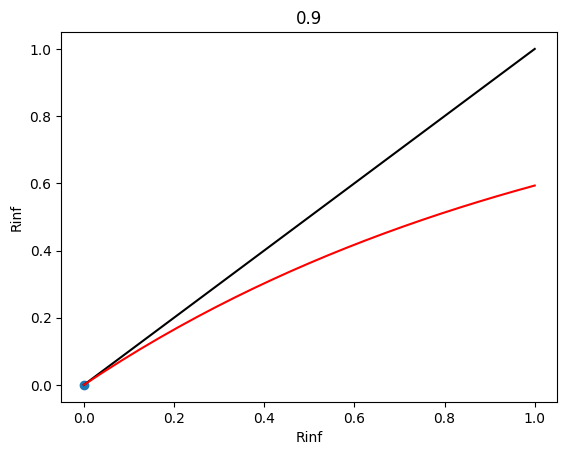

[8.15299439e-09]


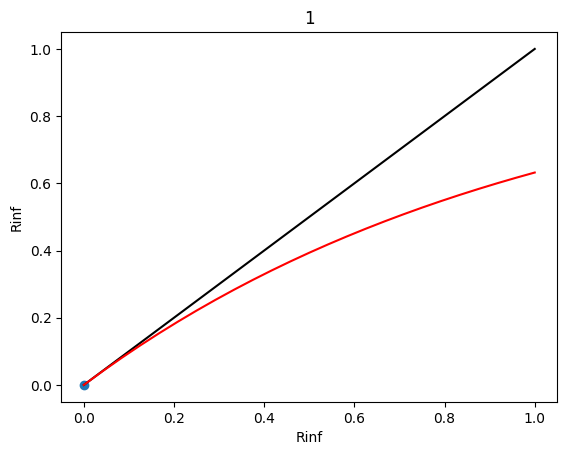

[0.17613414]


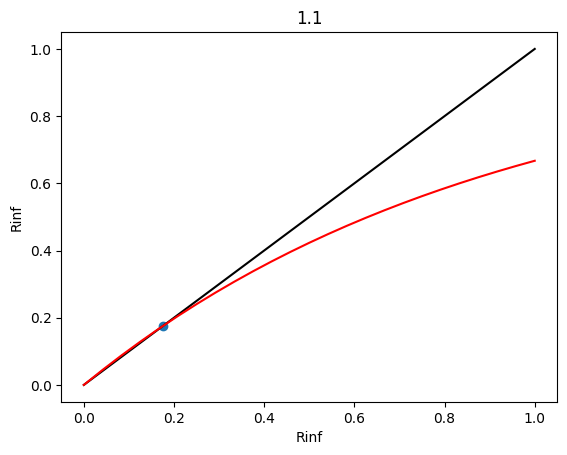

[0.31369833]


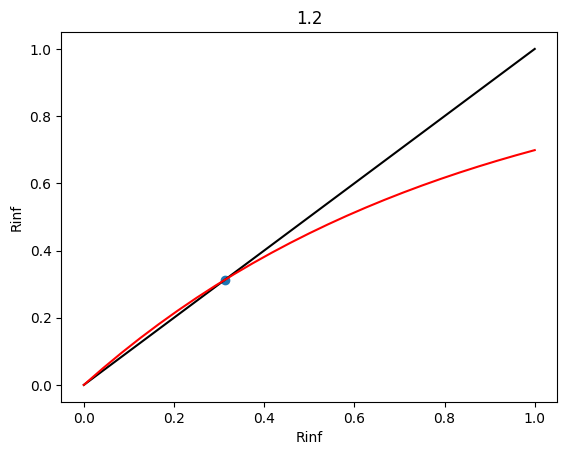

In [38]:
def f(r_inf):
    return r_inf

def g(r_inf, r_naught):
    return 1 - np.exp(-r_naught * r_inf)

def h(r_inf, r0):
    return f(r_inf) - g(r_inf, r_naught=r0)

x = np.linspace(0, 1,25)

r0s = {.9, 1, 1.1, 1.2}

for i,r0 in enumerate(r0s):
    f_vals = f(x)
    g_vals = g(x, r0)
    plt.plot(x, f_vals, c = 'k')
    plt.plot(x, g_vals, c = 'r')

    h_vals = h(x, r0)
    intersect = sp.fsolve(h, 1, r0)
    print(intersect)

    plt.scatter(intersect, intersect)

    plt.xlabel("Rinf")
    plt.ylabel("Rinf")
    plt.title(r0)

    plt.show()

[0.79681213]


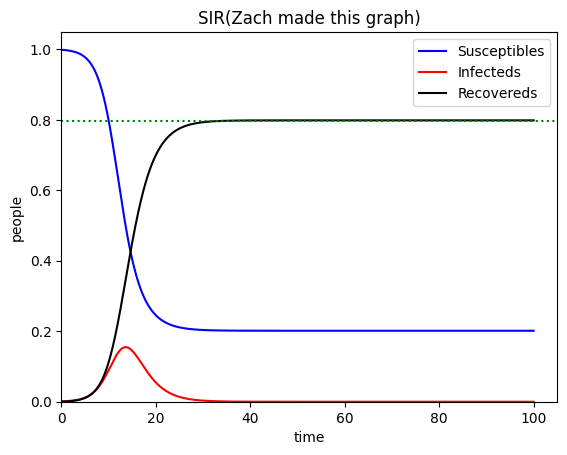

In [35]:
S,I,R,T = SIR_changing_total_population(S0 = 999, R0 = 0, I0=1, beta=1, gamma=.5, t_max= 100, stepsize=.05, birth_rate=0, death_rate=0)
N = S[t_max]+I[t_max]+R[t_max]
fig, ax = plt.subplots()
ax.plot(T,(S/N), color='b', label='Susceptibles')
ax.plot(T,(I/N), color='r', label='Infecteds')
ax.plot(T,(R/N), color='k', label='Recovereds')
ax.set_xlabel('time')
ax.set_ylabel('people')
ax.legend()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.set_title("SIR(Zach made this graph)")


R0 = beta/gamma
intersect = sp.fsolve(h, 1, R0)
ax.axhline(y = intersect, color='green', linestyle=':')

print(intersect)
